In [3]:
# !pip install supervision

In [4]:
import cv2
import supervision as sv
from ultralytics import YOLO

In [5]:
model = YOLO("yolov8n.pt")

In [26]:
img_path = '../_data/resource/id_swe.jpg'
img_path = '../_data/resource/pokerboard_play.jpg'
image = cv2.imread(img_path)
results = model(image)[0]
detections = sv.Detections.from_ultralytics(results)

0: 384x640 1 suitcase, 137.1ms
Speed: 4.3ms preprocess, 137.1ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


In [27]:
bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()

labels = [
    model.model.names[class_id]
    for class_id
    in detections.class_id
]

annotated_image = bounding_box_annotator.annotate(
    scene=image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections, labels=labels)

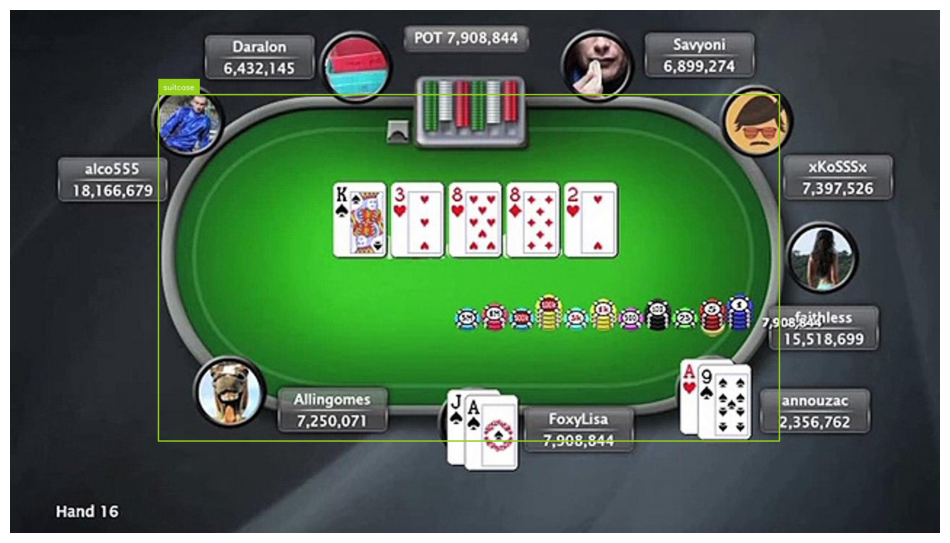

In [28]:
sv.plot_image(annotated_image)
